In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report


from sklearn.utils import resample

In [2]:
df = pd.read_csv('../data/waterQuality1.csv')
# https://www.kaggle.com/datasets/mssmartypants/water-quality/data

In [3]:
df = df.drop(df[df['ammonia'] == "#NUM!"].index)
df['ammonia'] = df['ammonia'].astype('float')
df['is_safe'] = df['is_safe'].astype('float')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [5]:
df_majority = df[df.is_safe == 0]
df_minority = df[df.is_safe == 1]

 
# # Downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=1000,     # to match minority class
#                                  random_state=123) # reproducible results
 
# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# # Display new class counts
# df_downsampled.is_safe.value_counts()
# # df_downsampled

In [6]:
from model_selection import random_under_sampling
df_majority_downsampled = random_under_sampling(df_majority,1500)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled

Current Size: 7084
Delete Size: 5584


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
18,4.88,26.94,0.020,0.36,0.001,1.21,0.68,0.71,0.99,0.75,...,0.071,0.31,1.22,0.002,56.70,1.00,0.00,0.41,0.05,0.0
23,4.32,20.64,0.030,2.60,0.008,7.24,0.61,1.23,1.44,0.56,...,0.012,9.42,1.74,0.004,36.23,3.22,0.07,0.18,0.08,0.0
24,2.36,27.05,0.010,0.68,0.003,4.07,0.13,1.34,0.29,0.96,...,0.167,15.05,1.92,0.002,56.32,7.99,0.06,0.50,0.06,0.0
43,3.13,28.19,0.001,0.25,0.001,3.58,0.68,1.29,1.04,0.49,...,0.079,15.05,1.09,0.005,23.68,3.39,0.01,0.20,0.03,0.0
52,0.86,18.64,0.040,1.31,0.003,5.47,0.04,1.97,0.59,0.18,...,0.169,5.03,1.84,0.004,38.49,7.12,0.07,0.28,0.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.000,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7995,0.05,24.22,0.020,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7996,0.09,6.85,0.000,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7997,0.01,10.00,0.010,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1.0


In [7]:

x = np.array(df_downsampled.drop(['is_safe'], axis=1))
y = np.array(df_downsampled['is_safe'].copy())

from model_selection import positive_negative_check
positive_negative_check(y)

y = np.where(y <= 0, -1, 1)
positive_negative_check(y)

Positive Class [1.0]: 912 sample.
Negative Class [0.0]: 1500 sample.
Total 2412 Samples.
Positive Class [1]: 912 sample.
Negative Class [-1]: 1500 sample.
Total 2412 Samples.


In [8]:
# from model_selection import train_test_split
from sklearn.model_selection import train_test_split
# buff_x, x_test, buff_y, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
# x_train, x_validate, y_train, y_validate = train_test_split(buff_x,buff_y, test_size=0.2, random_state=42)

buff_x, x_test, buff_y, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(buff_x,buff_y, test_size=0.3, random_state=11)
# x_train

In [9]:
model = svm.SVC(kernel='linear' ,C=10)
model.fit(x_train, y_train)

model.score(x_validate, y_validate)
y_pred = model.predict(x_test)
print(y_pred)
model.score(x_test, y_test)
    


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred, average="weighted"))
# print("Recall:",metrics.f1_score(y_test, y_pred, average="macro"))
# print(classification_report(y_test, y_pred))


[-1  1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1
 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1
 -1 -1 -1  1  1 -1  1 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1  1 -1  1 -1  1
  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1
 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1
 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1
 -1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1 -1  1 -1  1  1  1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1
  1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1
 -1 -1  1  1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1
  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1

In [10]:
from model import SVM
model2 = SVM(kernel='linear', learning_rate=0.001, max_itr=1900, debug=True, lambda_param=0.01, verbose=False)
model2.fit(x_train, y_train)

predict = model2.predict(x_test)
predict_validate = model2.predict(x_validate)

print("Validate Accuracy:",model2.score(x_validate, y_validate))

for i in range(len(predict)):
    print(predict[i], y_test[i])
print("Test Accuracy:",model2.score(x_test, y_test))

-- Parameter --
C: 1
Learning Rate: 0.001
Lambda Param: 0.01
N_Iters: 1900
---------------
Gradient 2565000 steps.
Validate Accuracy: 0.7530224525043178
-1.0 1
-1.0 1
-1.0 1
-1.0 1
-1.0 1
-1.0 -1
-1.0 1
1.0 1
-1.0 1
-1.0 -1
-1.0 1
-1.0 -1
-1.0 -1
-1.0 1
-1.0 -1
1.0 1
1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
1.0 1
1.0 1
-1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
1.0 1
-1.0 -1
-1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
-1.0 -1
-1.0 1
-1.0 1
1.0 1
1.0 1
-1.0 -1
-1.0 1
-1.0 -1
1.0 1
-1.0 -1
-1.0 -1
-1.0 1
1.0 1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
1.0 1
-1.0 1
-1.0 -1
-1.0 -1
-1.0 1
1.0 -1
-1.0 -1
-1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
1.0 1
1.0 1
-1.0 -1
-1.0 -1
-1.0 1
-1.0 -1
-1.0 -1
-1.0 1
-1.0 1
1.0 1
1.0 1
-1.0 -1
1.0 1
-1.0 -1
-1.0 1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
-1.0 -1
-1.0 1
-1.0 -1
1.0 1
1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 1
-1.0 -1
-1.

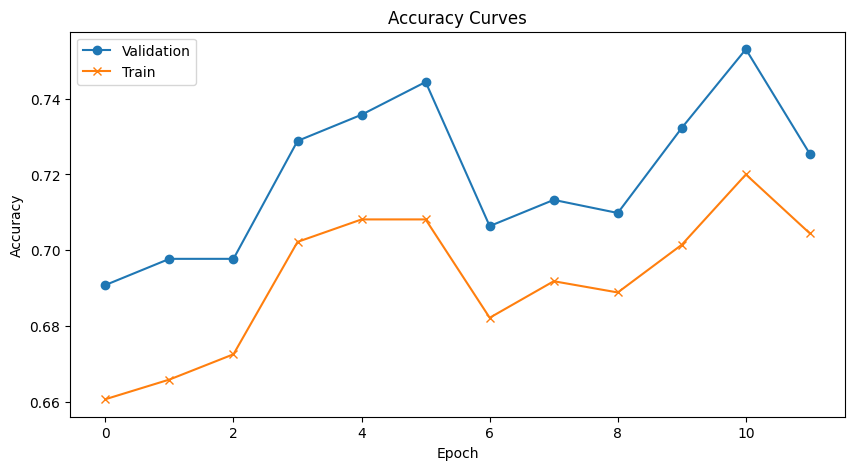

In [11]:
model2.plot_accuracy(x_train,y_train, x_validate, y_validate)